(768, 512, 3)
data saved to im.txt


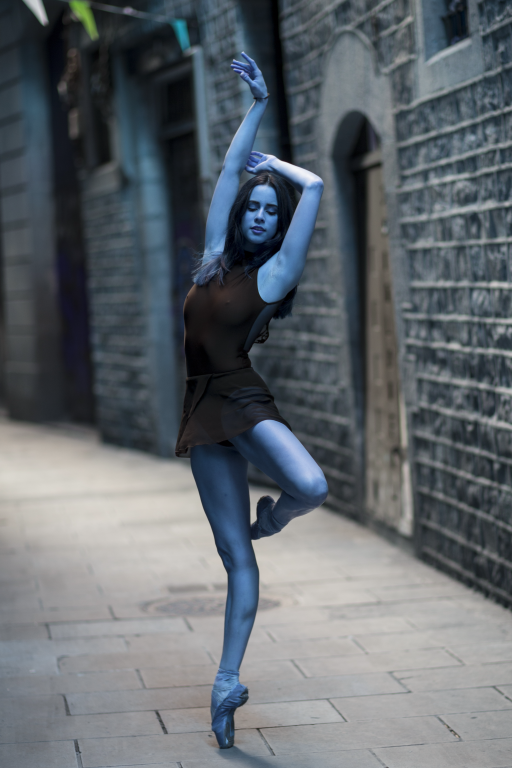

In [1]:
import numpy as np
from PIL import Image

def HWC3(x):
    assert x.dtype == np.uint8
    if x.ndim == 2:
        x = x[:, :, None]
    assert x.ndim == 3
    H, W, C = x.shape
    assert C == 1 or C == 3 or C == 4
    if C == 3:
        return x
    if C == 1:
        return np.concatenate([x, x, x], axis=2)
    if C == 4:
        color = x[:, :, 0:3].astype(np.float32)
        alpha = x[:, :, 3:4].astype(np.float32) / 255.0
        y = color * alpha + 255.0 * (1.0 - alpha)
        y = y.clip(0, 255).astype(np.uint8)
        return y
        
def resize_image(input_image, resolution):
    import cv2
    H, W, C = input_image.shape
    H = float(H)
    W = float(W)
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(np.round(H / 64.0)) * 64
    W = int(np.round(W / 64.0)) * 64
    img = cv2.resize(input_image, (W, H), interpolation=cv2.INTER_LANCZOS4 if k > 1 else cv2.INTER_AREA)
    return img


def preprocess(input_image, detect_resolution=512,):
    input_image = np.array(input_image)
    input_image = HWC3(input_image)
    input_image = resize_image(input_image, detect_resolution)
    H, W, C = input_image.shape
    print(input_image.shape)

    # RGB -> BGR or BGR -> RGB
    # the openpose model must read from BGR?
    img = input_image[:, :, ::-1].copy()
    return img



input_image = Image.open("pose.png")
im = preprocess(input_image)


def save_array_to_txt(arr, output):
    # 将 ndarray 展平为一维数组
    flat_arr = arr.flatten()
    
    # 将一维数组写入到 txt 文件中，每行一个元素
    with open(output, 'w') as f:
        for element in flat_arr:
            f.write(f"{element}\n")
    
    print(f"data saved to {output}")

save_array_to_txt(im, "im.txt")

Image.fromarray(im) #PIL in RGB mode, but the ndarray is actually in bgr mode

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path+"/detectors")

from detectors import Body

body_model_path = "body_pose_model.pth"

body_estimation = Body(body_model_path)

input_image = Image.open("pose.png")
im = preprocess(input_image)

candidate, subset = body_estimation(im)

# save_array_to_txt(candidate, "result.candidate.txt")
# save_array_to_txt(subset, "result.subset.txt")

candidate, subset

(768, 512, 3)
imageToTest_padded.shape: (184, 128, 3)
im.shape: (1, 3, 184, 128)
Mconv7_stage6_L1.shape: (1, 38, 23, 16)
Mconv7_stage6_L2.shape: (1, 19, 23, 16)
heatmap.shape: (23, 16, 19)
smart_resize_k Co 19
heatmap.shape: (184, 128, 19)
heatmap.shape: (184, 122, 19)
smart_resize Co 19
heatmap.shape: (768, 512, 19)
smart_resize_k Co 38
smart_resize Co 38
0: map_ori.shape: (768, 512)
1: map_ori.shape: (768, 512)
2: map_ori.shape: (768, 512)
3: map_ori.shape: (768, 512)
4: map_ori.shape: (768, 512)
5: map_ori.shape: (768, 512)
6: map_ori.shape: (768, 512)
7: map_ori.shape: (768, 512)
8: map_ori.shape: (768, 512)
9: map_ori.shape: (768, 512)
10: map_ori.shape: (768, 512)
11: map_ori.shape: (768, 512)
12: map_ori.shape: (768, 512)
13: map_ori.shape: (768, 512)
14: map_ori.shape: (768, 512)
15: map_ori.shape: (768, 512)
16: map_ori.shape: (768, 512)
17: map_ori.shape: (768, 512)


(array([[2.62000000e+02, 2.13000000e+02, 1.01669729e+00, 0.00000000e+00],
        [2.42000000e+02, 2.65000000e+02, 8.99996042e-01, 1.00000000e+00],
        [2.19000000e+02, 2.65000000e+02, 8.15157950e-01, 2.00000000e+00],
        [2.29000000e+02, 1.78000000e+02, 7.15776801e-01, 3.00000000e+00],
        [2.57000000e+02, 1.13000000e+02, 8.92477393e-01, 4.00000000e+00],
        [2.70000000e+02, 2.73000000e+02, 8.18913043e-01, 5.00000000e+00],
        [3.06000000e+02, 2.16000000e+02, 6.48312092e-01, 6.00000000e+00],
        [3.11000000e+02, 1.74000000e+02, 6.17904007e-01, 7.00000000e+00],
        [2.17000000e+02, 4.04000000e+02, 7.43819773e-01, 8.00000000e+00],
        [3.15000000e+02, 4.83000000e+02, 7.80592740e-01, 9.00000000e+00],
        [2.40000000e+02, 5.56000000e+02, 3.36627364e-01, 1.00000000e+01],
        [2.54000000e+02, 5.53000000e+02, 3.13973337e-01, 1.10000000e+01],
        [2.28000000e+02, 6.48000000e+02, 1.57400027e-01, 1.20000000e+01],
        [2.29000000e+02, 4.03000000e+0

In [3]:
import cv2
print ("OpenCV version :  {0}".format(cv2.__version__))

OpenCV version :  4.9.0


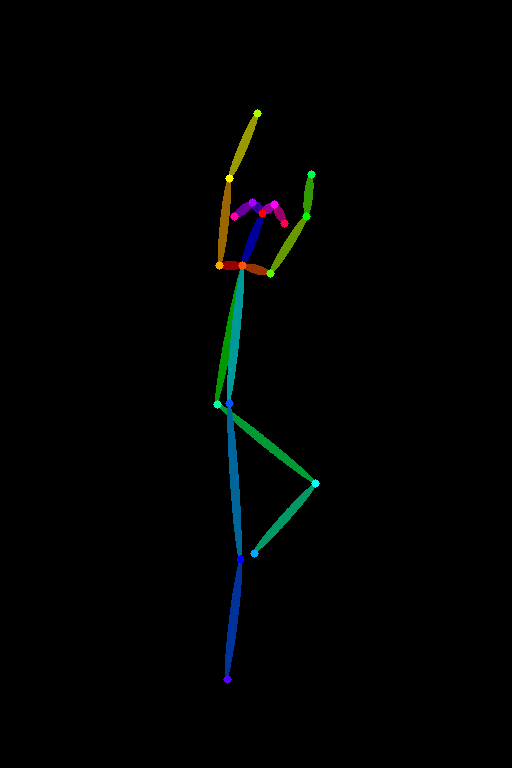

In [5]:
from detectors import Body, render_from_candidate_and_subset

H = 768
W = 512
pose_img = render_from_candidate_and_subset(candidate, subset, H, W)

pose_img